### 掌握了基本的数据分析方法之后，相信大家都希望能够将数据可视化，特别是客户只能理解图片，
### 看不懂也不想自己去费力去理解分析得出的数据，所以画图就显得很重要了，往往也是数据分析的最后一步。
### 现在市面上有很多成熟的画图工具，特别是利用js在前端绘制美轮美奂的图像，而且很多还是动态的，
### 有兴趣的同学可以自行搜索echart等进行学习，我们在这里只讲解如何利用python的matplotlib库绘制基本，但实用的几种基本图像。

In [19]:
# 导入必要的计算库
import numpy as np
import pandas as pd

In [20]:
# 导入绘图库
from matplotlib import pyplot as plt
import matplotlib as mpl

In [21]:
# 查看可用的绘图风格
plt.style.available[:10]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn']

In [22]:
# 设置绘图采用的风格 classic
plt.style.use('classic')

#### 绘制折线图

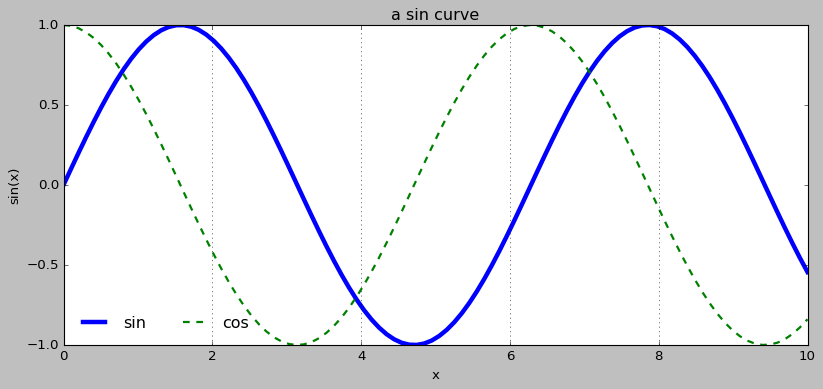

In [29]:
# 使用matplot风格绘制简单折线图
x = np.linspace(0,10,100)
fig = plt.figure(figsize=(12,5))
plt.plot(x,np.sin(x),'-',linewidth=4,label='sin')
plt.plot(x,np.cos(x),'--',linewidth=2,label='cos')
plt.title('a sin curve')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend(loc='lower left',frameon=False,ncol=2)
plt.grid(axis='x')

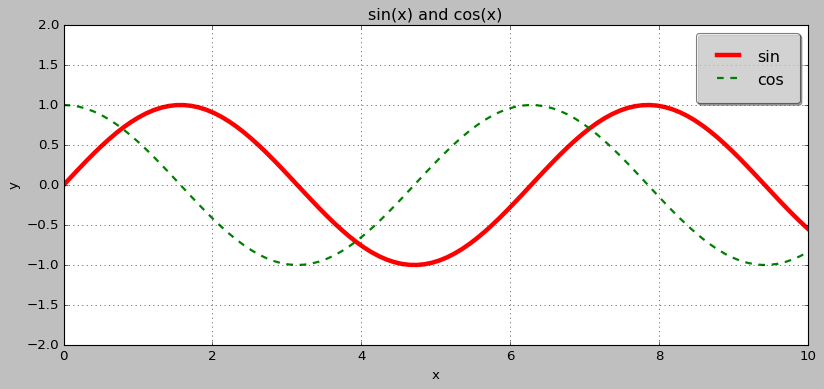

In [32]:
# 使用面向对象的风格绘制同样的图像
fig,ax = plt.subplots()
# 设置图像的大小
fig.set_figheight(5)
fig.set_figwidth(12)
# 在坐标轴内绘制图像
ax.plot(x,np.sin(x),'-',color='red',linewidth=4,label='sin')
ax.plot(x,np.cos(x),'--',color='green',linewidth=2,label='cos')
# 设置坐标轴上下限，名称以及标题
ax.set(xlim=(0,10),ylim=(-2,2),xlabel='x',ylabel='y',title='sin(x) and cos(x)')
# 设置并显示图例
ax.legend(fancybox=True,framealpha=0.5,shadow=True,borderpad=1,ncol=1)
ax.grid()

#### 示例 ：设置x轴和y轴显示的坐标值

In [35]:
# 准备数据
x = range(2,26,2)
y = [15,14.3,21,17,20,25,26,26,22,18,15,16]

In [36]:
# 设置图片大小和每英尺的像素点数
plt.figure(figsize=(12,5),dpi=80)

<Figure size 960x400 with 0 Axes>

<Figure size 960x400 with 0 Axes>

([<matplotlib.axis.YTick at 0x7f479f333668>,
 <a list of 7 Text major ticklabel objects>)

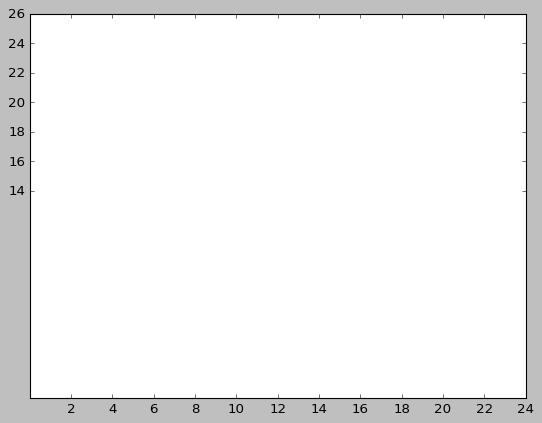

In [42]:
# 设置x轴和y轴显示的坐标值
plt.xticks([ i/2 for i in range(4,49)][::4])
plt.yticks(range(int(min(y)),int(max(y))+1,2))

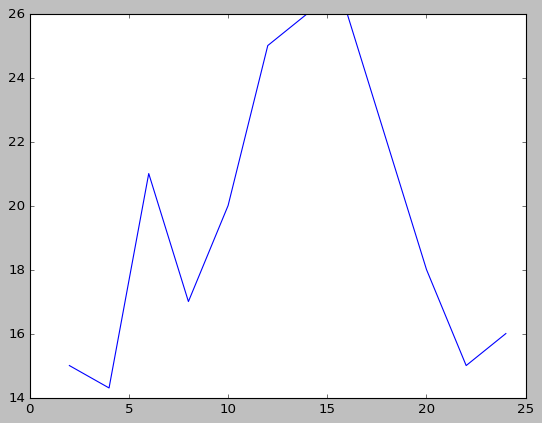

In [43]:
# 画图
plt.plot(x,y)
# 保存图片
plt.savefig('./myfig.png')

#### 读取保存的图片

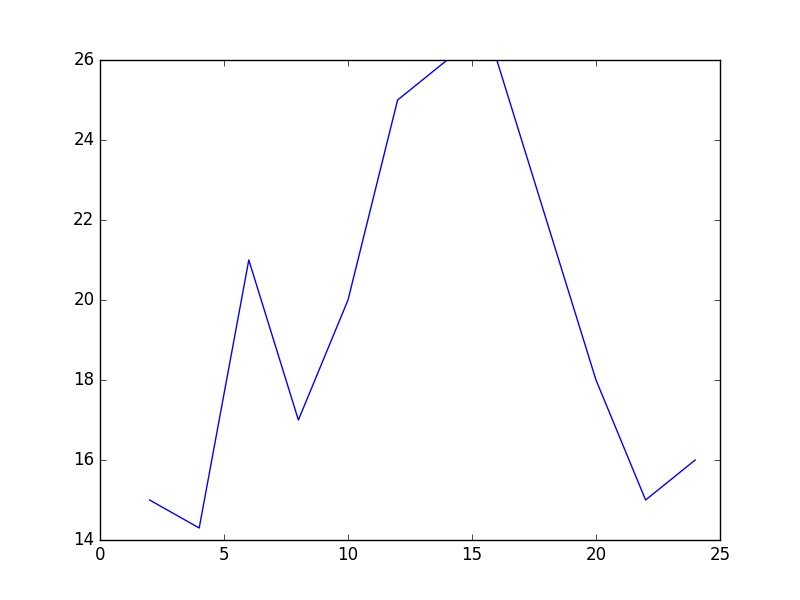

In [44]:
# using pillow
from PIL import Image
Image.open('myfig.png')

In [46]:
# 将图片文件转换为ndarray
pic_data = plt.imread('myfig.png')
pic_data.shape

(600, 800, 4)

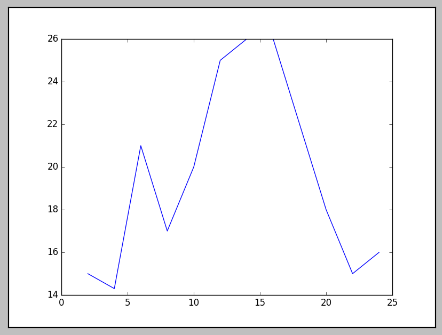

In [49]:
# 第一种读取方式
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(pic_data)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_locator(plt.NullLocator())

[[], []]

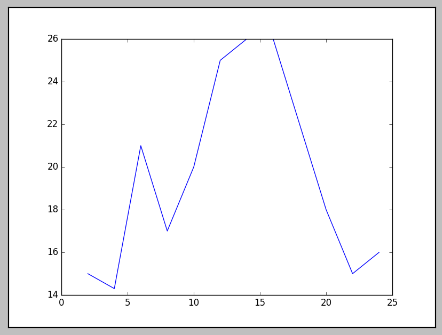

In [50]:
# 第二种读取方式
fig,ax = plt.subplots(figsize=(12,5))
ax.imshow(pic_data)
ax.set(xticks=[],yticks=[])

#### 绘制散点图

In [15]:
# 准备测试数据

# 绘制散点图


#### 示例 ：绘制iris特性相关数据散点图

In [16]:
# 从sklearn导入数据


In [18]:
# 绘制散点图


#### 绘制等高线图

In [17]:
# 准备测试数据
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

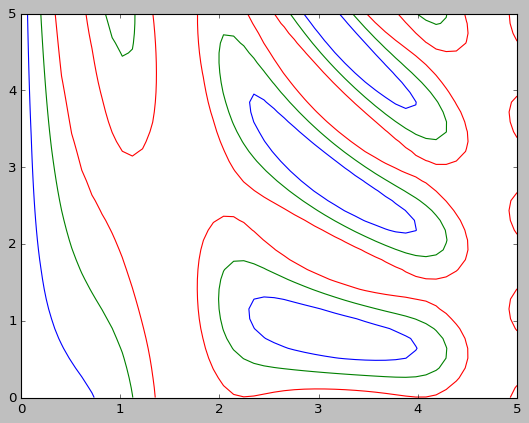

In [18]:
# contour with colors='black' or colors=['red','blue','green']
plt.contour(X,Y,Z,3,colors=['red','blue','green'])

<a list of 63 text.Text objects>

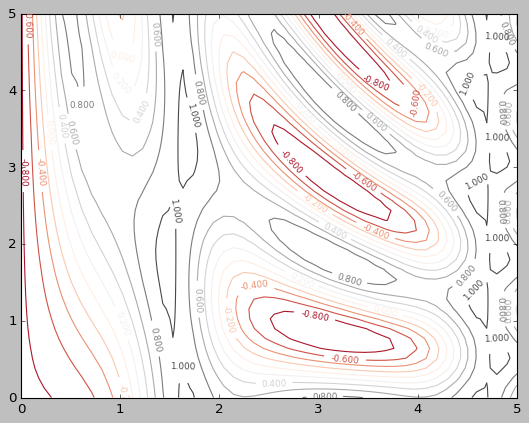

In [19]:
# contour with cmap='RdGy'
contours = plt.contour(X,Y,Z,10,cmap='RdGy')
# 在等高线上添加文字
plt.clabel(contours,inline=True,fontsize=8)

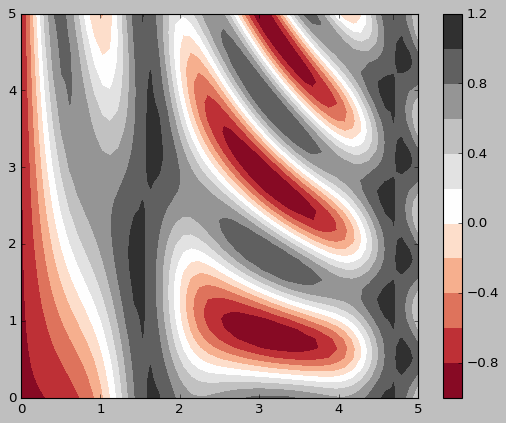

In [20]:
# contourf wuth cmap='RdGy'
plt.contourf(X,Y,Z,10,cmap='RdGy')
plt.colorbar()

(0.0, 5.0, 0.0, 5.0)

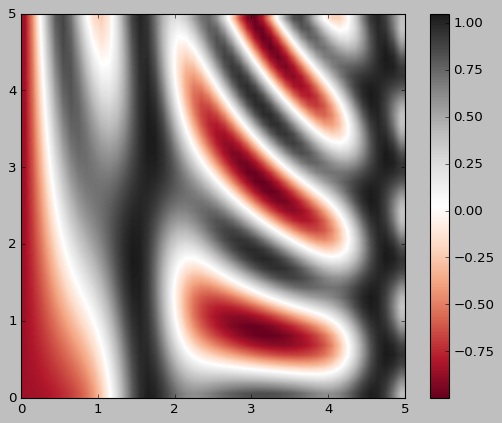

In [21]:
# 用图像的方式绘制等高线图
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

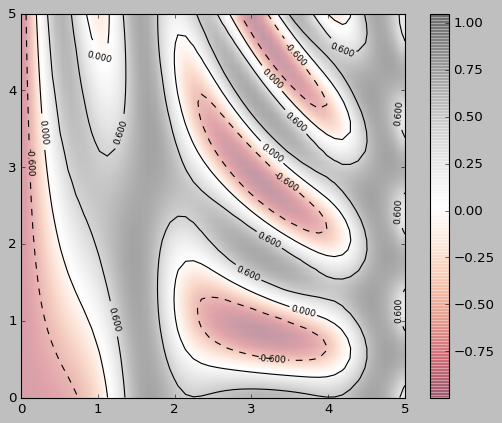

In [22]:
# 将等高线图和渐变背景组合起来变成一张图
contours = plt.contour(X,Y,Z,3,colors='black')
plt.imshow(Z,extent=[0,5,0,5],origin='lower',cmap='RdGy',alpha=0.4)
plt.clabel(contours,inline=True,fontsize=8)
plt.colorbar()

#### 绘制直方图

In [23]:
# 准备数据
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

In [24]:
# 设置参数
kwargs = dict(histtype='stepfilled',alpha=0.3,density=False,bins=40)

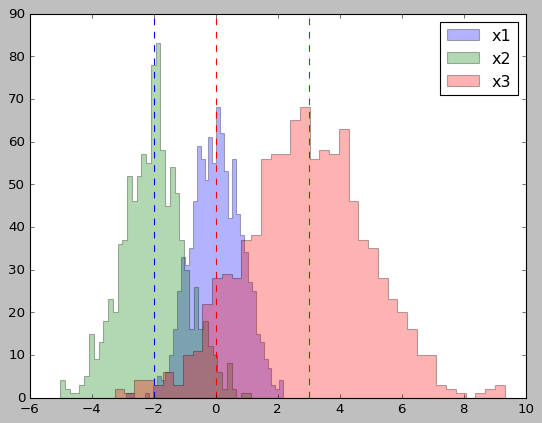

In [25]:
# 绘制直方图
plt.hist(x1,**kwargs,label='x1')
plt.hist(x2,**kwargs,label='x2')
plt.hist(x3,**kwargs,label='x3')
# 在x轴指定点处绘制垂直于x轴的直线
plt.axvline(x=0,color='red',linestyle='--')
plt.axvline(x=-2,color='blue',linestyle='--')
plt.axvline(x=3,color='green',linestyle='--')
# 绘制图例
plt.legend()

In [26]:
# 直接获取用于绘制直方图的数据
counts,bin_edges = np.histogram(x1,bins=5)
counts,bin_edges

(array([  6, 130, 431, 355,  78]),
 array([-2.89613685, -1.88007596, -0.86401507,  0.15204582,  1.1681067 ,
         2.18416759]))

#### 分开设置图例

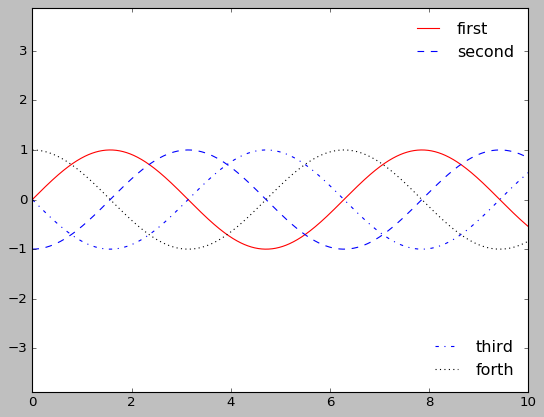

In [27]:
fig,ax = plt.subplots()
li = []
styles = ['-','--','-.',':']
colors = ['red','blue','blue','black']
x = np.linspace(0,10,1000)
for i in range(4):
#     li += ax.plot(x,np.sin(x-i*np.pi/2),styles[i],color='black')
    li.extend(ax.plot(x,np.sin(x-i*np.pi/2),styles[i],color=colors[i]))
# 设置头两条曲线的图例
plt.axis('equal')
ax.legend(li[:2],['first','second'],loc='upper right',frameon=False)
# 设置后两条曲线的图例
from matplotlib.legend import Legend
leg = Legend(ax,li[2:],['third','forth'],loc='lower right',frameon=False)
ax.add_artist(leg)

#### 绘制柱状图

- 本小节将通过示例，分享如何绘制较为常用的柱状图
- 以及如何在图片上标记文字

In [28]:
# 设置显示中文字体
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname="msyh.ttc")

In [29]:
# 编造实验数据
a = ['猜火车','低俗小说','曼达洛人','生活大爆炸']
b16 = [12323,321,4321,321]
b15 = [23312,123,4312,432]
b14 = [3213,321,1234,123]

In [30]:
# 设置每个柱体的高度
bar_width = 0.2
# 设置x轴坐标值
x14 = list(range(len(a)))
x15 = [i+bar_width for i in x14]
x16 = [i+bar_width*2 for i in x14]

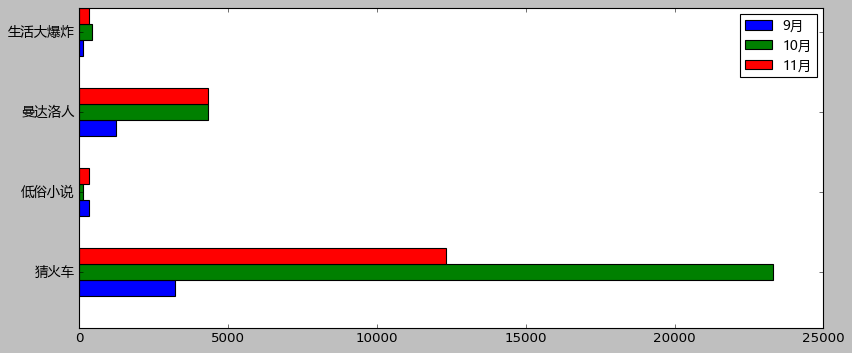

In [31]:
# 绘制横着的柱形图
plt.figure(figsize=(12,5),dpi=80)
plt.barh(x14,b14,height=bar_width,label="9月")
plt.barh(x15,b15,height=bar_width,label="10月")
plt.barh(x16,b16,height=bar_width,label="11月")
# 设置y轴显示的内容
plt.yticks(x15,a,fontproperties=my_font)
# 绘制图例
plt.legend(prop=my_font,loc="upper right")

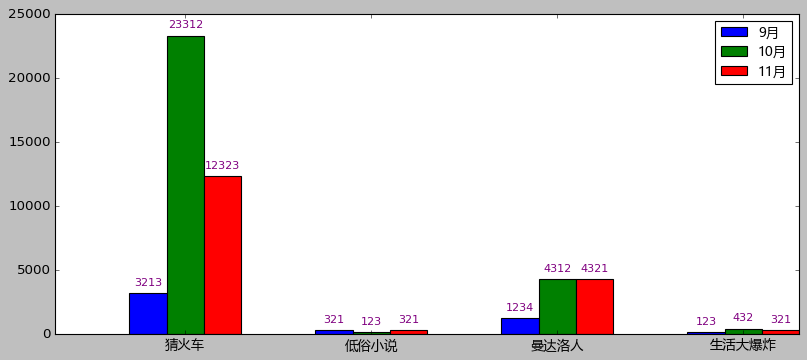

In [32]:
# 绘制柱形图
fig = plt.figure(figsize=(12,5),dpi=80)
ax = plt.axes()
# 设置字体颜色和大小
font_style_dict = dict(size=10,color='purple')
plt.bar(x14,b14,width=bar_width,label="9月")
for i,x in enumerate(x14):
    plt.text(x,b14[i]+600,b14[i],ha='center',transform=ax.transData,**font_style_dict)
plt.bar(x15,b15,width=bar_width,label="10月")
# 在坐标轴的某个指定位置绘制文字
for i,x in enumerate(x15):
    plt.text(x,b15[i]+600,b15[i],ha='center',transform=ax.transData,**font_style_dict)
plt.bar(x16,b16,width=bar_width,label="11月")
for i,x in enumerate(x16):
    plt.text(x,b16[i]+600,b16[i],ha='center',transform=ax.transData,**font_style_dict)
# 设置y轴显示的内容
plt.xticks(x15,a,fontproperties=my_font)
# 绘制图例
plt.legend(prop=my_font,loc="upper right")

#### 绘制饼图

- 重要参数说明:
    - labels 参数设置每一块的标签
    - labeldistance 参数设置标签距离圆心的距离（比例值）
    - autopct 参数设置比例值小数保留位(%.3f%%)
    - pctdistance 参数设置比例值文字距离圆心的距离
    - explode 参数设置每一块顶点距圆心的长度（比例值,列表）
    - colors 参数设置每一块的颜色（列表）
    - shadow 参数为布尔值，设置是否绘制阴影
    - startangle 参数设置饼图起始角度

In [33]:
# 准备数据
data_li = [2,3,4,1]

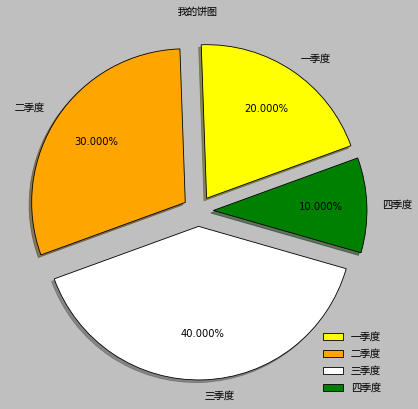

In [34]:
# 绘制饼图
plt.figure(figsize=(12,8),dpi=60)
pie = plt.pie(
    data_li, # 用于计算比例值的数据列表，饼图根据每个值和所有值的和的百分比来绘制
#     labels=['a','b','c','d'], # 每个值对于的百分比的名字，和值一一对应
    labels=['一季度','二季度','三季度','四季度'],
    explode=[0.1,0.1,0.1,0.1], # 每个饼离圆心的距离
    labeldistance=1.1, # 标签离圆心的距离
    shadow=True, # 是不是绘制阴影
    autopct="%.3f%%", # 显示三位小数
    pctdistance=0.7, # 设置比例值数字距离圆心的距离
    colors=['yellow','orange','white','green'], # 设置每个饼的颜色
    startangle=20, # 设置饼图的起始角度
)
# 将饼图中的标签变成中文的
for font in pie[1]:
    font.set_fontproperties(my_font)
plt.title('我的饼图',fontproperties=my_font)
plt.legend(prop=my_font,loc='lower right',frameon=False)

#### 绘制二维分布图

- 通过二维分布图，我们可以清楚的分析两组数据间的分布关系，在表格数据分析中还是很有用的
- 通过下面的示例你可以基本掌握绘制二维分布图，但详细信息请查看官方文档或示例库

In [35]:
# 准备二维数据
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

In [36]:
x.shape,y.shape

((3000,), (3000,))

In [37]:
# 建立4*4的网格对象
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=0.2,wspace=0.2)

<Figure size 480x480 with 0 Axes>

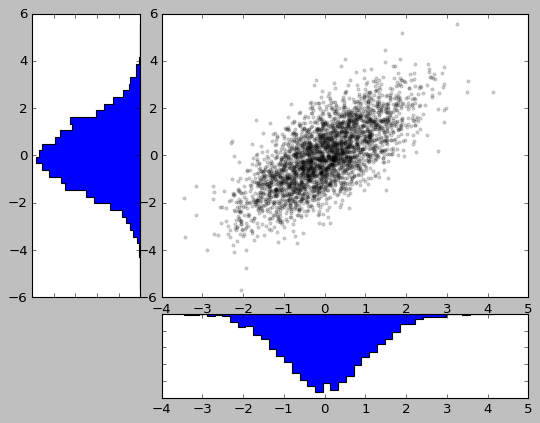

In [38]:
# 把网格对象分为3个子图
main_ax = plt.subplot(grid[:-1,1:])
y_hist = plt.subplot(grid[:-1,0],xticklabels=[],sharey=main_ax)
x_hist = plt.subplot(grid[-1,1:],yticklabels=[],sharex=main_ax)
# y_hist = plt.subplot(grid[:-1,0],xticklabels=[])
# x_hist = plt.subplot(grid[-1,1:],yticklabels=[])

# 分别绘制不同的图
main_ax.plot(x,y,'ok',markersize=3,alpha=0.2)
y_hist.hist(y,bins=40,histtype='stepfilled',orientation='horizontal',color='Blue')
x_hist.hist(x,bins=40,histtype='stepfilled',orientation='vertical',color='Blue')
y_hist.invert_xaxis()
x_hist.invert_yaxis()

#### 绘制简单3D图像

In [39]:
# 准备x,y轴数据
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
# 生成X,Y,Z数据
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)

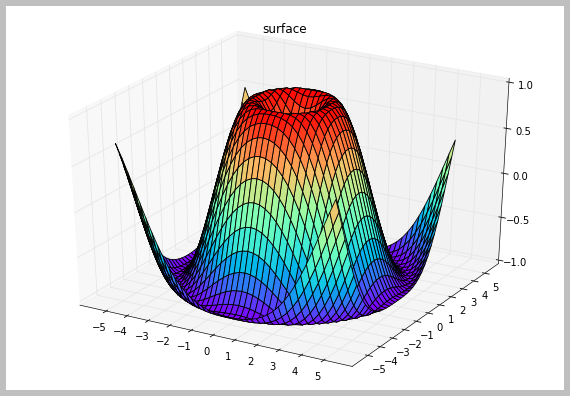

In [40]:
# 绘图
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,8),dpi=60)
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap=plt.get_cmap('rainbow'),rstride=1,cstride=1)
# ax.plot_surface(X,Y,Z,cmap='viridis',edgecolor='none',rstride=1,cstride=1)
ax.set_title('surface')
ax.set_xticks(ticks=np.arange(-5,6))
ax.set_yticks(ticks=np.arange(-5,6))